In [1]:
# Running in Google Colab? Run this cell
!wget https://raw.githubusercontent.com/CIERA-Northwestern/REACHpy/main/Module_2/data/HRstars.csv

# If you're not running in Colab, this file should be in the data directory.
# Change the loading path of the file to include 'data/' when the file is loaded

--2025-06-10 05:38:17--  https://raw.githubusercontent.com/CIERA-Northwestern/REACHpy/main/Module_2/data/HRstars.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1284 (1.3K) [text/plain]
Saving to: ‘HRstars.csv’

HRstars.csv         100%[===================>]   1.25K  --.-KB/s    in 0s      

2025-06-10 05:38:17 (58.2 MB/s) - ‘HRstars.csv’ saved [1284/1284]



# The Hertzsprung-Russell Diagram

## Section 1: Background

In this activity, you are going to make one of the most important tools in Astronomy, a Hertzprung-Russell (HR) diagram. HR diagrams show the relationship between the temperature of a star and a star's luminosity. These diagrams are tremendously useful for studying stars because, different types of stars fall in specific places on an HR diagram.



## Section 2: Loading data

The file `HRstars.csv` contains data for a set of stars arranged in two columns:
 - the temperature (in Kelvin) and
 - the luminosity (in solar luminosities).

Use `numpy` to read the data file and extract the appropriate data as separate variables. Since this is a comma separated value file, you will need to use `delimiter=','` in your call to `loadtxt`.

In [2]:
# Read in file using loadtxt
import numpy as np
data=np.loadtxt('HRstars.csv',delimiter=',')

## Section 3: Plotting the stellar data

Use `scatter` to plot the data with temperature along the x-axis and luminosity against the y-axis.

Give your figure the title 'HR Diagram' and label your axes correctly.

Text(0, 0.5, 'Luminosity (L$_\\odot$)')

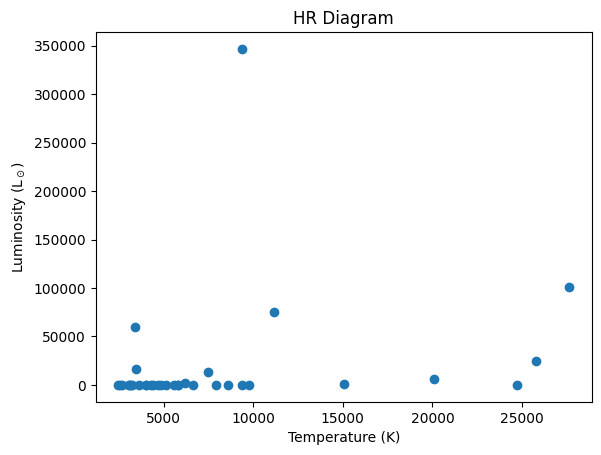

In [25]:
# Plot the data
import matplotlib.pyplot as plt
plt.scatter(data[:,0],data[:,1])
# Create title
plt.title('HR Diagram')
# Create x, y labels with units.
plt.xlabel('Temperature (K)')
plt.ylabel('Luminosity (L$_\odot$)')

## Section 4: Adjusting your figure

We're going to make some adjustments to your plot. HR diagrams are traditionally plotted with temperature increasing from right to left.

Typically, you can adjust your figure's domain by using `plt.xlim([x1, x2])` by adjusting `x1` and `x2` to fit the region you want.
Then, reverse the axis by placing a high value for `x1` and a lower value for `x2`.
Replot your data and play with different values of `x1` and `x2` until you are happy with the values decreasing from left to right.

(10000.0, 1000.0)

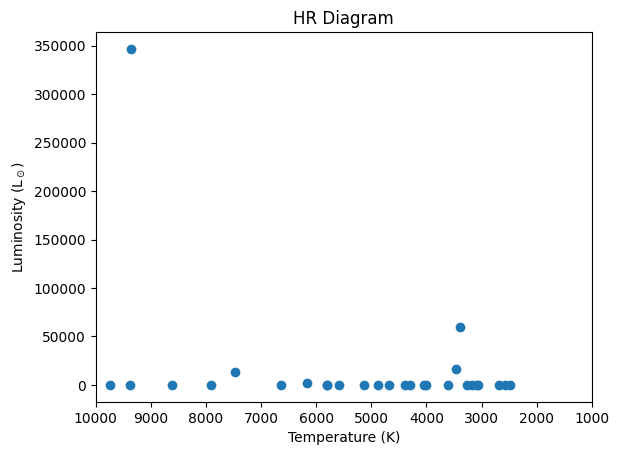

In [26]:
plt.scatter(data[:,0],data[:,1])
plt.title('HR Diagram')
plt.xlabel('Temperature (K)')
plt.ylabel('Luminosity (L$_\odot$)')
# Change limits
plt.xlim([10000,1000])

Also, you might notice that a lot of the data points are crowded around near temperature=5000 K and luminosity = 0. This often occurs in astronomy because values span many "orders of magnitude" (i.e. factors of 10).

One way to nicely deal with this is to change the axes to a log scale (`plt.xscale('log')` and `plt.yscale('log')`). Create a new version of your figure that uses logarithmic scaling for both axes. You may need to adjust the domain of the figure you chose in the previous step.

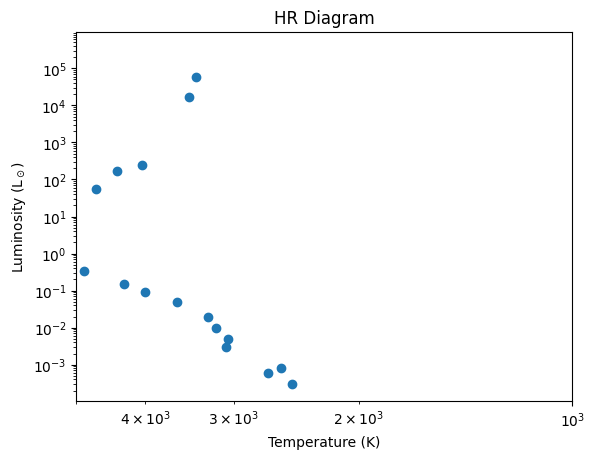

In [31]:
# Replot data
plt.scatter(data[:,0],data[:,1])
plt.title('HR Diagram')
plt.xlabel('Temperature (K)')
plt.ylabel('Luminosity (L$_\odot$)')
# Change to logarithmic scales
plt.xlim([5000,1000])
plt.xscale('log')
plt.yscale('log')
# Change limits

You have created a standard HR diagram that you would find in any textbook.

## Section 5: Adding color

Lets add some color! Hotter stars are bluer and colder stars are redder, so lets use a color map called `RdYlBu` for the colors of the points.

The `scatter` function allows you to change the colors of the points based on an array of input values. Use the `c` and `cmap` arguments in the `scatter` function to add color to your HR diagram. Refer to [Plotting with Matplotlib](https://github.com/CIERA-Northwestern/REACHpy/blob/main/Module_2/Section_3_Plotting_with_Matplotlib.ipynb) notebook for examples of using `scatter`.

Play around with the mapping until your hottest stars are blue and coldest stars are red.

*Hint: Since our temperatures span orders of magnitude, instead of giving your temperature values directly to `c`, you may want to give the `log10` of the temperature values to `c`.*

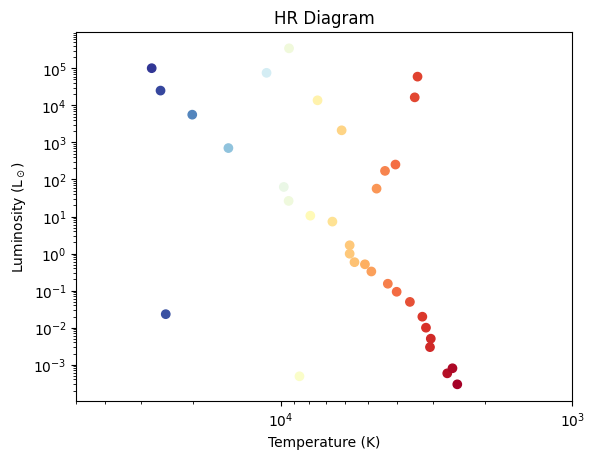

In [32]:
import matplotlib
cm = matplotlib.colormaps['RdYlBu']  ##This is the color map for the stars
plt.scatter(data[:,0],data[:,1],c=np.log10(data[:,0]),cmap=cm)
plt.title('HR Diagram')
plt.xlabel('Temperature (K)')
plt.ylabel('Luminosity (L$_\odot$)')
# Change to logarithmic scales
plt.xlim([50000,1000])
plt.xscale('log')
plt.yscale('log')

## Section 6: Taking it to the next level

Hotter stars are brighter, but it also turns out bigger stars are brighter because they have more surface area to emit light from. A fundamental relationship in astronomy relates a star's luminosity, radius, and temperature.

\begin{equation}
\frac{L}{L_{\odot}}=\Big(\frac{R}{R_{\odot}}\Big)^2\Big(\frac{T}{T_{\odot}}\Big)^4
\end{equation}

with $T_{\odot}$ = 5780 K.

Note that your data points already express the luminosity in solar luminosities $L_{\odot}$.

Solve for $\frac{R}{R_{\odot}}$ using the data already provided.

The scatter function also allows you to specify the size of points based on an array of input values.



In [13]:
# Approximate the sizes of the stars with the equation above and multiply them by 15.
T_sun=5780 # K
r_star=15*(data[:,1]/data[:,0])**2*(data[:,0]/T_sun)**4

Add `s=r_star` to your scatter argument to change the size of the stars in your figure to be representative of the size of the actual stars.

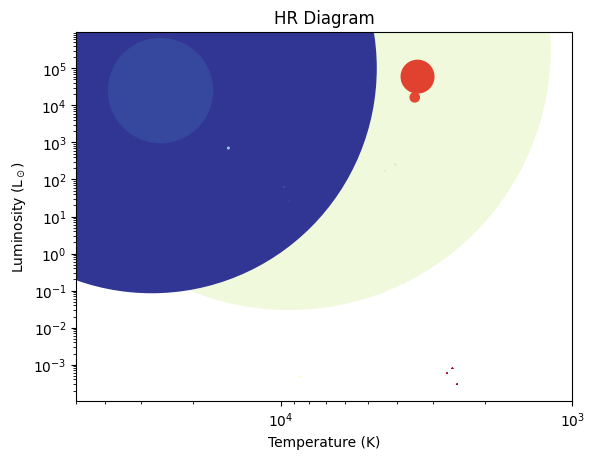

In [33]:
# Replot the data including size argument
cm = matplotlib.colormaps['RdYlBu']  ##This is the color map for the stars
plt.scatter(data[:,0],data[:,1],c=np.log10(data[:,0]),cmap=cm,s=r_star)
plt.title('HR Diagram')
plt.xlabel('Temperature (K)')
plt.ylabel('Luminosity (L$_\odot$)')
# Change to logarithmic scales
plt.xlim([50000,1000])
plt.xscale('log')
plt.yscale('log')
# Change limits

What do you notice about the stars in your H-R Diagram? The features you see in this diagram correspond to different types of stars, as you can see in the HR diagram shown below.

!['HR diagram'](https://github.com/CIERA-Northwestern/REACHpy/blob/main/Module_2/images/eso0728c.jpg?raw=1)

Each of these different types of stars correspond to interesting physics that happens at different points in the lifetime of stars. The "main sequence" is where stars live during the vast majority of their life, while they are fusing Hydrogen as a source of fuel. "Giant" stars are what you get when stars near the end of their lives. Though the exact physics is too complicated for this lesson, in short, stars near the end of their lives start burning a huge amount of fuel in a short amount of time, causing them to swell up and get very large and bright. But because the stars are so large, their surfaces also cool down some.

Finally, white dwarfs are the remnants of an old giant star when it can no longer produce nuclear reactions. Since they are small (about the size of Earth!), they aren't very bright.
